To resolve this problem we treat data on sql to import data of number meteorites by year.


In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
df = pd.read_excel ('New_year_data.xlsx')

Now we make a plot representing this distribution.

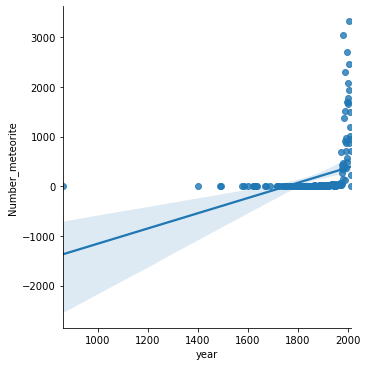

In [44]:
sns.lmplot(x="year", y="Number_meteorite", data=df)

In [45]:
x = df[["year"]]
y = df["Number_meteorite"]

model = linear_model.LinearRegression()
results = model.fit(x, y)

model = sm.OLS(y, x)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:       Number_meteorite   R-squared (uncentered):                   0.122
Model:                            OLS   Adj. R-squared (uncentered):              0.119
Method:                 Least Squares   F-statistic:                              35.00
Date:                Sat, 27 Mar 2021   Prob (F-statistic):                    1.08e-08
Time:                        11:38:54   Log-Likelihood:                         -1929.3
No. Observations:                 252   AIC:                                      3861.
Df Residuals:                     251   BIC:                                      3864.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This graphic is correct but cannot be use because there are some points very distant from others. So, we will eliminate all the points very distants from other points.All the points where there  are not much meteorite will also be move. We will take in account that at that time there were not very good method to detect méteorites . So we will take meteorite from the year 1970. Taking this year, will permit us to do a more realistic linear regression.

Our new lianear regression will be :

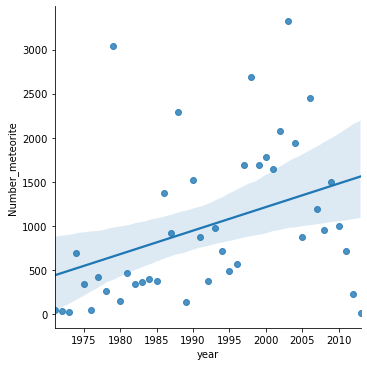

In [46]:
df2 = df[df['year']>1970]
df3 = df2[df2['year']<2014]
sns.lmplot(x="year", y="Number_meteorite", data=df3)

In [52]:
x = df3[["year"]]
y = df3["Number_meteorite"]

model = linear_model.LinearRegression()
results = model.fit(x, y)

print(results.intercept_, results.coef_)

E = results.intercept_+ results.coef_* 2014 

print(E)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

-52141.66445182725 [26.67774086]
[1587.30564784]
                                 OLS Regression Results                                
Dep. Variable:       Number_meteorite   R-squared (uncentered):                   0.576
Model:                            OLS   Adj. R-squared (uncentered):              0.566
Method:                 Least Squares   F-statistic:                              57.02
Date:                Sat, 27 Mar 2021   Prob (F-statistic):                    2.39e-09
Time:                        12:12:35   Log-Likelihood:                         -351.58
No. Observations:                  43   AIC:                                      705.2
Df Residuals:                      42   BIC:                                      706.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025     

The best linear approximation and therefore y=a+Bx with a= -52141.66445182725  b=26.67774086
We can conclude from this linear regression that the number of meteorites in 2014 will be :
1587.30564784

We can see that in this case the correlation coefficient is much higher than in the first case, but still very far from 1; So the method of linear regression is really not the best method of approximation.
So, this approach of prediction scientically not robust.
